In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

Lectura de ambos sets de datos y creación del dataset correspondiente

In [2]:
data = pd.read_csv('us2022q2a.csv')
df1 = pd.read_csv('us2022q2a.csv',names = data.columns)
df1

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
0,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,shortdebt,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto
1,A,2000q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.761670231,104,452000,NaN,2000,1
2,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,2679000,512000,0,4642000,45.215607496,73.75,452271.967,6,2000,2
3,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,2925000,528000,0,4902000,30.003237855,48.9375,453014.579,9,2000,3
4,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,3160000,830000,0,5265000,33.566840819,54.75,456366.381,12,2000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324443,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,11309.171,207.635,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0
324444,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,10258.173,209.068,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0
324445,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,9214.059,210.512,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0
324446,ZYNE,2022q2,0.0,0.0,9168.7695,0.0,-775.92786,-91.691,0.0,67006.959,9765.086,211.965,237.414,57241.873,1.14,1.14,43595.959,6.0,2022.0,2.0


In [3]:
data = pd.read_csv('usfirms2022.csv')
df2 = pd.read_csv('usfirms2022.csv', names = data.columns)
df2 = df2[["Ticker","Name", "Sector NAICS\r\nlevel 1"]]
df2

,Ticker,Name,Sector NAICS\r\nlevel 1
0,Ticker,Name,Sector NAICS\r\nlevel 1
1,FLWS,1 800 Flowers Com Inc,Retail Trade
2,TXG,"10x Genomics, Inc",Manufacturing
3,GOED,1847 Goedeker Inc,Retail Trade
4,ONEM,"1life Healthcare, Inc",Health Care and Social Assistance
...,...,...,...
3604,ZUO,"Zuora, Inc",Information
3605,ZWS,Zurn Elkay Water Solutions Corp,Manufacturing
3606,ZY,Zymergen Inc,"Professional, Scientific, and Technical Services"
3607,ZYNE,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [4]:
df = pd.merge(df1, df2, left_on='firm', right_on="Ticker")
df.dropna(thresh=8, inplace=True)
df = df.drop(columns=['Ticker'])
df = df.drop(df[df.firm.isnull()].index)
df = df.drop(df[df.revenue.isnull()].index)
df = df.drop(df[df.cogs.isnull()].index)
df = df.drop(df[df.adjprice.isnull()].index)
df

,firm,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,...,longdebt,stockholderequity,adjprice,originalprice,sharesoutstanding,fiscalmonth,year,cto,Name,Sector NAICS\r\nlevel 1
1,A,2000q2,2485000,1261000,1010000,0,42000,0,90000,7321000,...,0,4642000,45.215607496,73.75,452271.967,6,2000,2,"Agilent Technologies, Inc",Manufacturing
2,A,2000q3,2670000,1369000,1091000,0,28000,0,83000,7827000,...,0,4902000,30.003237855,48.9375,453014.579,9,2000,3,"Agilent Technologies, Inc",Manufacturing
3,A,2000q4,3372000,1732000,1182000,0,10000,0,163000,8425000,...,0,5265000,33.566840819,54.75,456366.381,12,2000,4,"Agilent Technologies, Inc",Manufacturing
4,A,2001q1,2841000,1449000,1113000,0,-6000,0,119000,9208000,...,0,5541000,18.840347087,30.729999542,456769.737,3,2001,1,"Agilent Technologies, Inc",Manufacturing
5,A,2001q2,2382000,1406000,1038000,0,273000,0,115000,9080000,...,0,5616000,19.925521947,32.5,457072.749,6,2001,2,"Agilent Technologies, Inc",Manufacturing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323811,ZYNE,2021q2,0.0,0.0,9838.4941,0.0,-117.52822,-5.943,0.0,98195.904,...,468.385,87699.257,5.29,5.29,41251.537,6.0,2021.0,2.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323812,ZYNE,2021q3,0.0,0.0,10210.652,0.0,-376.63675,-5.038,0.0,89996.17,...,411.237,78686.999,4.24,4.24,41251.537,9.0,2021.0,3.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323813,ZYNE,2021q4,0.0,0.0,8836.4365,0.0,16.937906,-4.433,0.0,81171.507,...,353.694,70913.334,2.88,2.88,41217.537,12.0,2021.0,4.0,"Zynerba Pharmaceuticals, Inc",Manufacturing
323814,ZYNE,2022q1,0.0,0.0,8903.915,0.0,317.25211,-96.044,0.0,74381.029,...,295.754,65166.97,2.05,2.05,42447.037,3.0,2022.0,1.0,"Zynerba Pharmaceuticals, Inc",Manufacturing


In [5]:
dfExtra = df

In [6]:
# Derive New Column from Existing Column
# Market Value = (originalprice * sharesoutstanding)

dfExtra = dfExtra.assign(market_value=lambda x: x.originalprice.astype(np.float) * x.sharesoutstanding.astype(np.float))

# Book Value of the firm = (totalassets-totalliabilities)

dfExtra = dfExtra.assign(book_value=lambda x: x.totalassets.astype(np.float) - x.totalliabilities.astype(np.float))

#BookToMarketRatio = bookvalue / marketvalue
dfExtra = dfExtra.assign(BookToMarketRatio=lambda x: x.book_value.astype(np.float) / x.market_value.astype(np.float))

#ShortFinancialLeverage = shortdebt / totalassets

dfExtra = dfExtra.assign(ShortFinancialLeverage=lambda x: x.shortdebt.astype(np.float) / x.totalassets.astype(np.float) )

#LongFinancialLeverage = longdebt / totalassests

dfExtra = dfExtra.assign(LongFinancialLeverage=lambda x: x.longdebt.astype(np.float) / x.totalassets.astype(np.float) )

#netincome = revenue - cogs - sgae - otheropexp - incometax - finexp + extraincome
dfExtra = dfExtra.assign(netincome=lambda x: x.revenue.astype(np.float) - x.cogs.astype(np.float) - x.sgae.astype(np.float) - x.otheropexp.astype(np.float) - x.incometax.astype(np.float) - x.finexp.astype(np.float) + x.extraincome.astype(np.float))
 #EPS = net income / sharesoutstanding
 
dfExtra = dfExtra.assign(EPS=lambda x: x.netincome.astype(np.float) / x.sharesoutstanding.astype(np.float) )

In [7]:
df_Services = dfExtra[(dfExtra['Sector NAICS\r\nlevel 1']=='Accommodation and Food Services') | (dfExtra['Sector NAICS\r\nlevel 1']=='Administrative and Support and Waste Management and Remediation Services') | (dfExtra['Sector NAICS\r\nlevel 1']=='Arts, Entertainment, and Recreation') | (dfExtra['Sector NAICS\r\nlevel 1']=='Educational Services') | (dfExtra['Sector NAICS\r\nlevel 1']=='Health Care and Social Assistance') | (dfExtra['Sector NAICS\r\nlevel 1']=='Information') | (dfExtra['Sector NAICS\r\nlevel 1']=='Other Services (except Public Administration)') |  (dfExtra['Sector NAICS\r\nlevel 1']=='Professional, Scientific, and Technical Services') | (dfExtra['Sector NAICS\r\nlevel 1']== 'Transportation and Warehousing')].copy()

df_Services.dropna(thresh=5, inplace=True)
df_Services.set_index(['firm'], inplace = True)

#EPSP = EPS \ NetIncome('adjprice')
df_Services = df_Services.assign(EPSP=lambda x: x.EPS.astype(np.float) / x.originalprice.astype(np.float) )


df_Services['R'] = np.log(df_Services['adjprice'].astype(np.float)) - np.log(df_Services.groupby(['firm'])['adjprice'].shift(4).astype(np.float))
df_Services['RNQ'] = df_Services.groupby(['firm'])['R'].shift(-1)


df_Services = df_Services.sort_values(by=['q','market_value'], ascending = True)
df_Services['size'] = df_Services.groupby(['q'])['market_value'].transform(lambda x: pd.qcut(x,3,labels = ['small', 'medium', 'big']))

In [8]:
independent_var = ['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']
dependent_var = ['R']

In [9]:
df_Services = df_Services.groupby("firm").tail(2).groupby("firm").head(1)
df_Services

,q,revenue,cogs,sgae,otheropexp,extraincome,finexp,incometax,totalassets,totalliabilities,...,book_value,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,netincome,EPS,EPSP,R,RNQ,size
firm,,,,,,,,,,,,,,,,,,,,,
MGLN,2021q2,1220768.0,951249.0,266098.0,0.0,743.0,6026.0,-1196.0,3217929.0,1294108.0,...,1.923821e+06,0.777567,0.000987,0.162066,-6.660000e+02,-0.025357,-0.000269,0.255235,0.221294,medium
SINO,2021q3,1796.21,1626.868,2040.965,997.685,14.296105,0.0,0.0,53689.153,6560.791,...,4.712836e+04,1.274141,0.009568,0.022242,-2.855012e+03,-0.176758,-0.077187,0.477895,0.839640,small
RRGB,2021q3,275444.0,0.0,287580.0,0.0,0.0,2870.0,-26.0,921724.0,825559.0,...,9.616500e+04,0.265443,0.064646,0.648940,-1.498000e+04,-0.953509,-0.041349,-0.366256,-0.691937,small
HMHC,2021q3,417130.0,183029.0,142192.0,-3628.0,1851.0,8221.0,-6192.0,2086347.0,1716150.0,...,3.701970e+05,0.215912,0.007077,0.215054,9.535900e+04,0.746934,0.055617,2.049370,1.575847,medium
GSKY,2021q3,128149.0,33867.0,33095.0,11793.0,-23982.0,6655.0,4368.0,1405020.0,1479542.0,...,-7.452200e+04,-0.036191,0.000000,0.321127,1.438900e+04,0.078125,0.006988,0.923472,0.897542,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GOOGL,2022q1,68011000.0,29599000.0,18318000.0,0.0,-1160000.0,0.0,2498000.0,357096000.0,103092000.0,...,2.540040e+08,0.138166,0.000000,0.073241,1.643600e+07,24.866434,0.008940,0.299008,-0.113746,big
MSFT,2022q1,49360000.0,15615000.0,13381000.0,0.0,-174000.0,0.0,3462000.0,344607000.0,181683000.0,...,1.629240e+08,0.070488,0.005075,0.139803,1.672800e+07,2.231332,0.007237,0.276361,-0.045203,big
SIDU,2022q1,1799.335,820.99799,1084.2939,2158.489,0.000004,65.908,0.0,15954.127,6415.41,...,9.538717e+03,NaN,0.082587,0.157357,-2.330354e+03,NaN,NaN,NaN,NaN,NaN


1. Realiza un análisis exploratorio de las variables:

**1.1 Calcula matriz de varianza y covarianza, así como matriz de correlación de las variables independientes y la dependiente. Explicar qué es la varianza, covarianza y correlación. Interpreta la matriz de correlación. Tiene que utilizar álgebra matricial y corroborar resultados con funciones de Python**

In [10]:
df_cov = df_Services[independent_var]
df_variables = df_cov.dropna()
df_variables

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
firm,,,,
MGLN,-0.000269,0.777567,0.000987,0.162066
SINO,-0.077187,1.274141,0.009568,0.022242
RRGB,-0.041349,0.265443,0.064646,0.648940
HMHC,0.055617,0.215912,0.007077,0.215054
GSKY,0.006988,-0.036191,0.000000,0.321127
...,...,...,...,...
META,0.012334,0.203598,0.007058,0.078518
GOOGL,0.008940,0.138166,0.000000,0.073241
MSFT,0.007237,0.070488,0.005075,0.139803


Varianza mide, valga la redundancia, la variación de los datos del promedio de un determinado conjunto de datos. Su fómula se compone de la siguiente manera:
 
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTyrqMqeDwINvtAhXdsKnyVcGTonKtb7jNjJw&usqp=CAU" alt="Formula de la varianza"/>

Asismismo, la covariaza es la relación de coincidencia de la desviación estándar del promedio de una variable respecto a la desviación del promedio de otra. En fórmula, se define como:

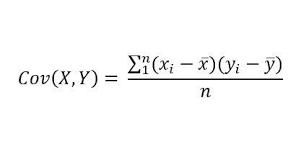

Por otro lado, la Correlación es la covarianza de dos variables normalizada a través de la desviación estándar. la correlación se encuentra medida en un ranfo de -1 a 1. Su fórmula se compone de la siguiente manera:

<img src="https://economipedia.com/wp-content/uploads/2015/12/formula-correlaci%C3%B3n.png" alt="Formula de la varianza"/>



**Cálculo de matrices con álgebra lineal**

Covarianza

In [11]:
df_matrix = np.matrix(df_variables)
n = df_variables.count()['EPSP']
df_matrix_s = (df_matrix.T * df_matrix) / n 

df_matrix_mean = df_variables.mean()
df_matrix_mean = np.matrix(df_matrix_mean).T
df_matrix_mean_s = df_matrix_mean * df_matrix_mean.T

cov_matrix = pd.DataFrame(data = df_matrix_s - df_matrix_mean_s)
cov_matrix.columns = ['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']
cov_matrix.index = ['EPSP', 'BookToMarketRatio', 'ShortFinancialLeverage', 'LongFinancialLeverage']
cov_matrix

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.008654,-0.006096,-0.000781,0.002289
BookToMarketRatio,-0.006096,0.315051,-0.005255,-0.042252
ShortFinancialLeverage,-0.000781,-0.005255,0.015919,0.005607
LongFinancialLeverage,0.002289,-0.042252,0.005607,0.074979


Correlación

In [12]:
df_matrix_std = np.matrix(df_variables.std())
corr_matrix = cov_matrix / (df_matrix_std.T * df_matrix_std)
corr_matrix

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.998723,-0.116592,-0.066483,0.089741
BookToMarketRatio,-0.116592,0.998723,-0.074103,-0.274559
ShortFinancialLeverage,-0.066483,-0.074103,0.998723,0.162079
LongFinancialLeverage,0.089741,-0.274559,0.162079,0.998723


**Cálculo de matrices con numpy**

Covarianza

In [13]:
df_variables.cov()

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,0.008665,-0.006104,-0.000782,0.002292
BookToMarketRatio,-0.006104,0.315454,-0.005261,-0.042306
ShortFinancialLeverage,-0.000782,-0.005261,0.015939,0.005614
LongFinancialLeverage,0.002292,-0.042306,0.005614,0.075075


Correlación

In [14]:
df_variables.corr()

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
EPSP,1.000000,-0.116741,-0.066568,0.089855
BookToMarketRatio,-0.116741,1.000000,-0.074198,-0.274910
ShortFinancialLeverage,-0.066568,-0.074198,1.000000,0.162286
LongFinancialLeverage,0.089855,-0.274910,0.162286,1.000000


Para ambos casos de varianza-covarianza y de correlación, la implementación por álgebra matricial dista muy ligeramente de las obtenidas por medio de numpy; por lo que se puede deducir que el cálculo resulta aceptable.

Las matrices varianza-covarianza resaltan el hecho de que la covarianza es negativa en muchos casos; lo que se intuye como una covariación que se comporte de manera inversa: valores altos tendrán coeficientes bajos; mientras que valores bajos tendrán coreficientes altos.

A su vez, podemos deducir qu,e más allá de las diagonales de las matrices, los valores presentados en la correlación entre variables dependientes son bajos; por lo que pareciera que la selección de variables es correcta para un modelo de regresión lineal.

**1.2 Corre pruebas estadísticas para detectar outliers y leverage points. Tiene que utilizar álgebra matricial para las pruebas y explicar claramente cómo funcionan las pruebas. Puede utilizar funciones de Python para corroborar resultados.**

Leverage: Es la medición de la distancia en eje x entre un determinado dato (i) con el promedio de los datos. A su vez, mide la influencia que se tiene respecto a los valores predecidos de y en un modelo de regresión.

Outliers: Miden el residuo de determinados datos en términos de desviación estándar

Leverage points

El cálculo de los leverage points se hace a través de la siguiente fórmula

<img src="./images/leverage_points_formula.jpg" alt="Formula de leverage points"/>

Donde hii se refiere a los leverage points en cuestión, k es la cantidad de variables independientes y n la cantidad de muestras o datos que se tienen.

Antes de poder hacer el cálculo, se hace un manejo matricial con el set de datos, se pasa a una matriz de numpy y luego se obtiene un arreglo del tamaño de n, con puros valores en 1.


In [15]:
df_Services.reset_index(inplace = True)
df_to_leverage = pd.DataFrame(data = df_Services[independent_var])
df_to_leverage.replace(np.nan, 0, inplace = True)
x_ones = np.ones((df_to_leverage.count()['EPSP'], 1))
df_to_leverage

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage
0,-0.000269,0.777567,0.000987,0.162066
1,-0.077187,1.274141,0.009568,0.022242
2,-0.041349,0.265443,0.064646,0.648940
3,0.055617,0.215912,0.007077,0.215054
4,0.006988,-0.036191,0.000000,0.321127
...,...,...,...,...
784,0.008940,0.138166,0.000000,0.073241
785,0.007237,0.070488,0.005075,0.139803
786,0.000000,0.000000,0.082587,0.157357
787,-0.014827,0.201011,0.013928,0.076147


Posteriormente se obtiene el set de datos correspondiente, basado en la diagonal de la "hat_matrix" de la matriz "x" obtenida anteriormente.

La diagonal sigue la siguiente fórmula 

<img src="./images/h_hat_formula.jpg" alt="Formula de leverage points"/>

donde x es la matriz obtenida,y x' es la transpuesta.

con el cálculo de la diagonal, se aplica la fórmula de hii para obtener el threshold. Los leverage points serán aquellos que cuenten con un coeficiente mayor al thresold

In [16]:
x = np.matrix(df_to_leverage)
x = np.c_[x_ones, x]

h = x * np.linalg.inv(x.T * x) * x.T

df_leverage = pd.DataFrame(data = {'Leverage': np.diag(h)})
df_leverage = pd.concat([df_to_leverage, df_leverage], axis=1, join = "inner")

threshold_leverage = 3 * ((len(independent_var) + 1) / df_to_leverage.count()['EPSP'])
df_leverage[df_leverage['Leverage'] > threshold_leverage]


,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,Leverage
10,-0.425459,1.477859,0.138811,0.065776,0.029411
12,-0.634863,0.799520,0.004623,0.023010,0.058878
42,-0.098820,2.953651,0.023101,0.262654,0.029525
55,-0.614124,0.899969,0.006155,0.014446,0.055103
74,-0.282793,1.952484,0.047120,0.007156,0.019662
88,-0.072320,5.020101,0.010268,0.432876,0.097677
89,0.017566,4.216189,0.023245,0.231977,0.065010
91,-1.354837,1.143635,0.014813,0.014988,0.267867
101,-0.138742,2.445987,0.004507,0.191139,0.019880
105,-0.294613,-0.471083,0.600423,0.079161,0.043379


In [17]:
df_Services = df_Services.dropna()

In [18]:
model = sm.OLS(df_Services[dependent_var], sm.add_constant(df_Services[independent_var])).fit()

Cálculo de los leverage points a través de la obtención de influencias de un modelo de regresión lineal denomidado

In [19]:
influence = model.get_influence()
leverage = influence.hat_matrix_diag
leverage_sm = pd.DataFrame(data = {"leverage": leverage})
leverage_sm = pd.concat([df_Services[independent_var], leverage_sm], axis = 1, join ="inner")
leverage_sm[leverage_sm['leverage'] > threshold_leverage]

,EPSP,BookToMarketRatio,ShortFinancialLeverage,LongFinancialLeverage,leverage
10,-0.425459,1.477859,0.138811,0.065776,0.030615
12,-0.634863,0.799520,0.004623,0.023010,0.061289
37,-0.009387,0.434067,0.002689,0.232304,0.030794
49,-0.065559,1.320636,0.000000,0.000000,0.057370
64,-0.132694,0.276233,0.333536,0.043965,0.020470
75,-0.087975,2.365509,0.000000,0.000000,0.102914
76,-0.019154,0.597408,0.063329,0.169479,0.067831
78,-0.078689,0.459738,0.020568,0.085667,0.276956
86,-0.030827,0.397680,0.000000,0.000000,0.020661
90,-0.026780,0.767367,0.000000,0.024658,0.045562


Outliers

Para el cálculo de outliers se hace consideración de los residuos estandarizados o standarized residuals, que se tratan de residuos de cada muestra dividido entre la desviación estándar de cada una de las muestras en cuestión.

Primero se obtienen la matriz de predicciones con el modelo previamente implementado, posteriormente se obtiene la matriz de errores a través de la resta entre la matriz transpuesta de la variable dependiente y la matriz de predicciones.

Después, se obtiene el MSE a través de la división entre la suma de errores cuadrados y la resta de la cantidad de muestra y la cantidad de variables independientes.

Con el MSE se obtiene el error cuadrado obteniendo la raíz del producto entre el MSE y 1 - el leverage obtenido previamente.

Finalmente, se obtienen los residuales estandarizados, que en este caso sería la matriz transpuesta de la resultante entre la matriz de errores y la matriz de errores cuadrados.

Lo explicado anteriormente está relacionado con el código a continuación


In [20]:
predictions = model.predict(sm.add_constant(df_Services[independent_var]))
errors = np.matrix(df_Services[dependent_var]).T - np.matrix(predictions)

mse = np.square(errors).sum() / (df_Services[independent_var].count()['EPSP'] - (len(independent_var) + 1))
squared_error = np.sqrt(mse * (1 - leverage))

std_residuals = pd.DataFrame((errors / squared_error).T)

std_residuals.columns = ['std_resid']
std_residuals = pd.concat([df_Services['R'], std_residuals], axis = 1)
std_residuals[std_residuals['std_resid'] > 3]

,R,std_resid
3,2.04937,4.378405


Por otro lado, se hace la obtención de outliers a través de la influencia del modelo para corroborar resultados

In [21]:
influence_sum = influence.summary_frame()
influence_sum

,dfb_const,dfb_EPSP,dfb_BookToMarketRatio,dfb_ShortFinancialLeverage,dfb_LongFinancialLeverage,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.023758,0.007601,0.017879,-0.005644,-0.014663,0.000456,0.981031,0.002364,0.047757,0.981004,0.047755
1,0.035247,-0.035224,0.085968,-0.002688,-0.047174,0.004312,1.968267,0.005535,0.146840,1.972446,0.147152
2,0.004382,0.006081,-0.001257,0.000281,-0.018078,0.000124,-0.407984,0.003699,-0.024861,-0.407734,-0.024846
3,0.185686,0.114632,-0.070132,-0.021459,-0.089174,0.010458,4.378405,0.002720,0.228668,4.438192,0.231791
4,0.083534,0.008113,-0.064857,-0.024706,-0.017048,0.002308,2.125398,0.002548,0.107421,2.130925,0.107700
...,...,...,...,...,...,...,...,...,...,...,...
781,0.005450,0.000776,-0.004245,-0.001135,-0.000037,0.000014,0.176376,0.002167,0.008219,0.176251,0.008214
782,0.014146,0.002293,-0.008153,0.001203,-0.007256,0.000048,0.312155,0.002480,0.015564,0.311948,0.015554
783,-0.019251,-0.003429,0.008242,0.001141,0.013424,0.000078,-0.342996,0.003322,-0.019803,-0.342773,-0.019790
784,0.052961,0.007242,-0.025832,-0.004975,-0.036425,0.000577,0.892074,0.003615,0.053729,0.891939,0.053721


In [22]:
r_res = pd.concat([df_Services['R'], influence_sum], axis = 1)
std_residuals_ib = r_res[['R', 'student_resid']]
std_residuals_ib[std_residuals_ib['student_resid'] > 3]

,R,student_resid
3,2.04937,4.438192


**2. Haz un análisis de multicolinealidad explicando la prueba e implicaciones en el modelo.**

**Análisis de multicolinearidad**

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

multicol_info_df = pd.DataFrame()
var_df = pd.concat([df_Services[independent_var]], axis = 1)
multicol_info_df['variable'] = var_df.columns
multicol_info_df['value'] = [vif(var_df.values, i) for i in range(len(var_df.columns))]
multicol_info_df

,variable,value
0,EPSP,1.035594
1,BookToMarketRatio,1.105425
2,ShortFinancialLeverage,1.114632
3,LongFinancialLeverage,1.182782


Como se puede ver arriba, los valores de multicolinearidad de cada una de las variables independientes oscila en un rango entre 1.00 a 1.12. Considerando que un valor aproximado a 2.5 comienza a denotar comportamientos de multicolinearidad de variabes, los valores obtenidos se encuentran dentro de un rango muy aceptable.

**3. Propone e implementa soluciones a los problemas de los puntos anteriores para que el modelo sea el más adecuado.**

Una solución concisa que se puede implementar la distancia de Cooks para determinar la influencia de los datos.

Primero que nada se despliega un resumen del modelo, destacando un porcentaje de R^2 del 20%

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     44.29
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           4.65e-33
Time:                        10:58:25   Log-Likelihood:                -454.32
No. Observations:                 685   AIC:                             918.6
Df Residuals:                     680   BIC:                             941.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1319      0.034     -3.862      0.000      -0.199      -0.065
EPSP                       2.1792      0.186     11.731      0.000       1.814       2.544
BookToMarketRatio         -0.1184      0.032     -3.677      0.000      -0.182      -0.055
ShortFinancialLeverage     0.1234      0.138      0.896      0.371      -0.147       0.394
LongFinancialLeverage      0.1097      0.069      1.595      0.111      -0.025       0.245
==============================================================================
Omnibus:                      105.271   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.194
Skew:                          -0.788   Prob(JB):                     1.06e-60
Kurtosis:                       5.682   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Se obtiene la influencia de los datos respecto al modelo y se obtiene del resumen de la influencia la distancia de cooks de cada dato

In [25]:
influence = model.get_influence()
cooks = influence.summary_frame()['cooks_d']
cooks

0      0.000456
1      0.004312
2      0.000124
3      0.010458
4      0.002308
         ...   
781    0.000014
782    0.000048
783    0.000078
784    0.000577
785    0.000423
Name: cooks_d, Length: 685, dtype: float64

Con un valor aribtrario de distancia de Cooks mayor a 1 se considera que dichos datos pueden afectar en el rendimiento del modelo. Por lo que todos los valores que cumplan con estan condición serán descartados

In [26]:
inf_points = cooks[cooks > 1]
inf_points

372    3.215636
Name: cooks_d, dtype: float64

In [27]:
df_Services.drop(inf_points.index, inplace = True)

**4.Estima e interpreta un modelo de regresión múltiple después de atender los problemas anteriores. Tiene que utilizar álgebra matricial para estimar coeficientes y errores estándar del modelo de regresión, y utilizar funciones de Python para corroborar resultados.** 

Resumen del modelo

Como se puede observar ajustando el modelo con el nuevo set de datos tras implementar la mejor considerando distancia de Cooks, el porcentaje de R^2 es de un 25%, por lo que se nota una mejoría del 5%

In [28]:
model = sm.OLS(df_Services[dependent_var], sm.add_constant(df_Services[independent_var])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      R   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     59.44
Date:                Thu, 24 Nov 2022   Prob (F-statistic):           4.82e-43
Time:                        10:58:26   Log-Likelihood:                -430.61
No. Observations:                 684   AIC:                             871.2
Df Residuals:                     679   BIC:                             893.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.1277      0.033     -3.868      0.000      -0.193      -0.063
EPSP                       2.9180      0.209     13.984      0.000       2.508       3.328
BookToMarketRatio         -0.1036      0.031     -3.320      0.001      -0.165      -0.042
ShortFinancialLeverage     0.1529      0.133      1.148      0.251      -0.109       0.415
LongFinancialLeverage      0.1193      0.067      1.793      0.073      -0.011       0.250
==============================================================================
Omnibus:                       42.470   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.564
Skew:                          -0.323   Prob(JB):                     5.35e-23
Kurtosis:                       4.783   Cond. No.                         13.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
variables_df = pd.DataFrame(data = df_Services[independent_var])
variables_df = variables_df.dropna()

x = np.matrix(variables_df)
x_ones = np.ones((df_Services.count()['EPSP'], 1))
x = np.c_[x_ones, x]

y = np.matrix(df_Services[dependent_var])
bs = pd.DataFrame(np.linalg.inv(x.T * x) * x.T * y)
variables_df = independent_var + ["const"]
bs.index = variables_df
bs


,0
EPSP,-0.127749
BookToMarketRatio,2.917998
ShortFinancialLeverage,-0.103621
LongFinancialLeverage,0.152911
const,0.119322
